# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')


# Load Data


In [4]:
data=pd.read_csv("Downloads/logistics_synthetic_data_realistic_v1.csv")

In [5]:
data.head()

OrderID                            CustomerID  \
0  6875ee14-fca3-467f-93a9-7e7b4e4bf4a1  5b869bdb-9ad2-41a4-bccc-04a16e5bea2e   
1  91c3ec11-9265-4bbe-b29b-891347f2606a  5b4d73a2-0aa3-4664-b46f-a3f6278d6faf   
2  83234702-1ed4-4879-9a19-4a709e0e96f6  205a35ef-4d2d-458a-a919-76a9b652e23b   
3  127377e0-cf9a-457d-bb72-268de7fa6056  f2e4f888-4617-43b0-869f-c0a9b8fb9cdb   
4  a395bab8-3b59-4162-b911-e37788925672  3fec6668-07d5-47e2-8d4d-6d906141d390   

    OrderDate ShipmentDate DeliveryDate ShipmentMode ProductCategory  \
0  2022-11-15   2024-03-31   2024-06-30          Sea        Clothing   
1  2022-09-22   2022-11-19   2023-06-28         Rail        Clothing   
2  2022-10-02   2023-10-01   2024-01-28          Air        Clothing   
3  2022-12-06   2024-04-09   2024-07-30         Rail            Food   
4  2024-02-26   2024-06-09   2024-07-28          Air            Food   

                              ProductID  Quantity   UnitPrice   TotalPrice  \
0  3c995c8b-d687-4ea9-8e7a-8e85b733ad37        90  137.409500  7767.598802   
1  2de80652-6fef-4dfb-a478-18d8b43f5392        38  276.058325  6570.442108   
2  1d0bfaa2-8317-4688-916d-525c0fae06b5        12   79.232419   503.289431   
3  695f41eb-cf8d-4941-affe-f1bd735435e3        90  129.213693  6509.301203   
4  26fc7f2e-a82f-4308-8208-d058d351798c        50   67.999077  1920.937465   

   Discount  ShippingCost OrderStatus       SourceCity SourceState  \
0  0.400038     32.741196     Shipped      New Bradley    Illinois   
1  0.362907     50.763998     Shipped      Griffinfurt    Illinois   
2  0.474012     60.415286     Shipped  Lake Carlamouth     Florida   
3  0.433729     50.826616     Shipped      East Justin    New York   
4  0.461357     41.153687     Shipped  New Kristamouth    Illinois   

    DestinationCity DestinationState  DeliveryTimeDays           Carrier  
0  West Melissaberg            Texas         14.336462               UPS  
1   New Ginaborough       California         19.685490  Amazon Logistics  
2          New Leah       California         30.621673               UPS  
3       Robertmouth       California         19.224554  Amazon Logistics  
4    Port Randyport            Texas         11.256788               DHL

In [6]:
data.shape

(10000, 20)

# Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           10000 non-null  object 
 1   CustomerID        10000 non-null  object 
 2   OrderDate         10000 non-null  object 
 3   ShipmentDate      10000 non-null  object 
 4   DeliveryDate      10000 non-null  object 
 5   ShipmentMode      10000 non-null  object 
 6   ProductCategory   10000 non-null  object 
 7   ProductID         10000 non-null  object 
 8   Quantity          10000 non-null  int64  
 9   UnitPrice         10000 non-null  float64
 10  TotalPrice        10000 non-null  float64
 11  Discount          10000 non-null  float64
 12  ShippingCost      10000 non-null  float64
 13  OrderStatus       10000 non-null  object 
 14  SourceCity        10000 non-null  object 
 15  SourceState       10000 non-null  object 
 16  DestinationCity   10000 non-null  object 

In [9]:
data.describe()

Quantity     UnitPrice    TotalPrice      Discount  ShippingCost  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      49.971300    145.565658   4342.883609      0.401468     30.024030   
std       28.484649     78.775959   3692.262133      0.054539     15.840522   
min        1.000000      6.198208     14.975474      0.196679      4.054879   
25%       25.000000     84.690760   1483.664724      0.364784     17.953781   
50%       50.000000    134.923204   3392.205685      0.408464     27.328848   
75%       75.000000    197.519210   6243.606640      0.444795     38.573160   
max       99.000000    455.657222  24985.385720      0.499135    109.819100   

       DeliveryTimeDays  
count      10000.000000  
mean          13.048196  
std            7.071128  
min            1.000000  
25%            7.638040  
50%           12.462150  
75%           17.787304  
max           44.940380

In [10]:
data.duplicated().sum()

0

- There are zero duplicate rows present in the dataset

## Data Preparation

In [16]:
data.drop(['OrderID', 'CustomerID','ProductID','SourceCity','DestinationCity'],axis=1,inplace=True)

In [17]:
data.head(10)

OrderDate ShipmentDate DeliveryDate ShipmentMode ProductCategory  \
0  2022-11-15   2024-03-31   2024-06-30          Sea        Clothing   
1  2022-09-22   2022-11-19   2023-06-28         Rail        Clothing   
2  2022-10-02   2023-10-01   2024-01-28          Air        Clothing   
3  2022-12-06   2024-04-09   2024-07-30         Rail            Food   
4  2024-02-26   2024-06-09   2024-07-28          Air            Food   
5  2023-05-19   2023-12-24   2024-03-31         Road            Food   
6  2022-08-31   2024-07-21   2024-07-22         Road            Food   
7  2023-09-22   2024-05-01   2024-07-27         Road        Clothing   
8  2023-11-09   2023-12-30   2024-08-05         Rail            Food   
9  2023-09-16   2024-01-23   2024-02-25          Sea        Clothing   

   Quantity   UnitPrice   TotalPrice  Discount  ShippingCost OrderStatus  \
0        90  137.409500  7767.598802  0.400038     32.741196     Shipped   
1        38  276.058325  6570.442108  0.362907     50.763998     Shipped   
2        12   79.232419   503.289431  0.474012     60.415286     Shipped   
3        90  129.213693  6509.301203  0.433729     50.826616     Shipped   
4        50   67.999077  1920.937465  0.461357     41.153687     Shipped   
5        22  197.984772  2400.344597  0.424300     13.670248     Shipped   
6        21  131.384990  1794.802132  0.355383     11.131575    Returned   
7        24  205.491077  2643.190945  0.488633     33.547032   Cancelled   
8        50   91.367045  2891.208541  0.371695     20.613386   Cancelled   
9        95  158.765198  9116.092889  0.421950     11.784295     Shipped   

  SourceState DestinationState  DeliveryTimeDays           Carrier  
0    Illinois            Texas         14.336462               UPS  
1    Illinois       California         19.685490  Amazon Logistics  
2     Florida       California         30.621673               UPS  
3    New York       California         19.224554  Amazon Logistics  
4    Illinois            Texas         11.256788               DHL  
5    New York          Florida         17.842296              USPS  
6  California         Illinois          1.000000              USPS  
7     Florida       California         29.590531  Amazon Logistics  
8  California         Illinois          4.690407              USPS  
9  California       California         11.636799               UPS

In [18]:
data.OrderStatus.value_counts()

OrderStatus
Shipped      7163
Cancelled    1991
Returned      846
Name: count, dtype: int64

- The data is imbalanced, and we need to handle it.

In [20]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['ShipmentDate'] = pd.to_datetime(data['ShipmentDate'])
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])
data.dtypes

OrderDate           datetime64[ns]
ShipmentDate        datetime64[ns]
DeliveryDate        datetime64[ns]
ShipmentMode                object
ProductCategory             object
Quantity                     int64
UnitPrice                  float64
TotalPrice                 float64
Discount                   float64
ShippingCost               float64
OrderStatus                 object
SourceState                 object
DestinationState            object
DeliveryTimeDays           float64
Carrier                     object
dtype: object

- we have changed dataType of OrderDate ,ShipmentDate ,DeliveryDate string object to datetime

In [22]:

data['OrderToShipmentDays'] = (data['ShipmentDate'] - data['OrderDate']).dt.days
data['ShipmentToDeliveryDays'] = (data['DeliveryDate'] - data['ShipmentDate']).dt.days
data['OrderToDeliveryDays'] = (data['DeliveryDate'] - data['OrderDate']).dt.days

In [23]:
data= data.drop(['OrderDate', 'ShipmentDate', 'DeliveryDate'], axis=1)

In [24]:
data.head(10)

ShipmentMode ProductCategory  Quantity   UnitPrice   TotalPrice  Discount  \
0          Sea        Clothing        90  137.409500  7767.598802  0.400038   
1         Rail        Clothing        38  276.058325  6570.442108  0.362907   
2          Air        Clothing        12   79.232419   503.289431  0.474012   
3         Rail            Food        90  129.213693  6509.301203  0.433729   
4          Air            Food        50   67.999077  1920.937465  0.461357   
5         Road            Food        22  197.984772  2400.344597  0.424300   
6         Road            Food        21  131.384990  1794.802132  0.355383   
7         Road        Clothing        24  205.491077  2643.190945  0.488633   
8         Rail            Food        50   91.367045  2891.208541  0.371695   
9          Sea        Clothing        95  158.765198  9116.092889  0.421950   

   ShippingCost OrderStatus SourceState DestinationState  DeliveryTimeDays  \
0     32.741196     Shipped    Illinois            Texas         14.336462   
1     50.763998     Shipped    Illinois       California         19.685490   
2     60.415286     Shipped     Florida       California         30.621673   
3     50.826616     Shipped    New York       California         19.224554   
4     41.153687     Shipped    Illinois            Texas         11.256788   
5     13.670248     Shipped    New York          Florida         17.842296   
6     11.131575    Returned  California         Illinois          1.000000   
7     33.547032   Cancelled     Florida       California         29.590531   
8     20.613386   Cancelled  California         Illinois          4.690407   
9     11.784295     Shipped  California       California         11.636799   

            Carrier  OrderToShipmentDays  ShipmentToDeliveryDays  \
0               UPS                  502                      91   
1  Amazon Logistics                   58                     221   
2               UPS                  364                     119   
3  Amazon Logistics                  490                     112   
4               DHL                  104                      49   
5              USPS                  219                      98   
6              USPS                  690                       1   
7  Amazon Logistics                  222                      87   
8              USPS                   51                     219   
9               UPS                  129                      33   

   OrderToDeliveryDays  
0                  593  
1                  279  
2                  483  
3                  602  
4                  153  
5                  317  
6                  691  
7                  309  
8                  270  
9                  162

In [25]:
data.columns

Index(['ShipmentMode', 'ProductCategory', 'Quantity', 'UnitPrice',
       'TotalPrice', 'Discount', 'ShippingCost', 'OrderStatus', 'SourceState',
       'DestinationState', 'DeliveryTimeDays', 'Carrier',
       'OrderToShipmentDays', 'ShipmentToDeliveryDays', 'OrderToDeliveryDays'],
      dtype='object')

### Missing Values Handling

In [27]:
data.isna().sum()

ShipmentMode              0
ProductCategory           0
Quantity                  0
UnitPrice                 0
TotalPrice                0
Discount                  0
ShippingCost              0
OrderStatus               0
SourceState               0
DestinationState          0
DeliveryTimeDays          0
Carrier                   0
OrderToShipmentDays       0
ShipmentToDeliveryDays    0
OrderToDeliveryDays       0
dtype: int64

- There is no missing values so we don't need to handle them

### Univariate Analysis

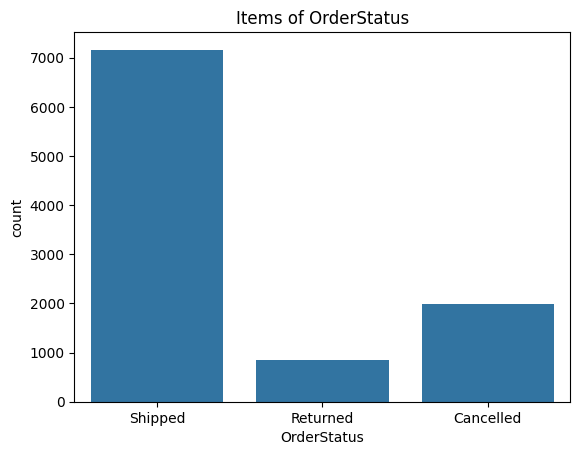

In [30]:
sns.countplot(x='OrderStatus',data=data)
plt.title("Items of OrderStatus")
plt.show()

- The plot shows that the majority of orders are shipped, with significantly fewer orders being cancelled or returned.

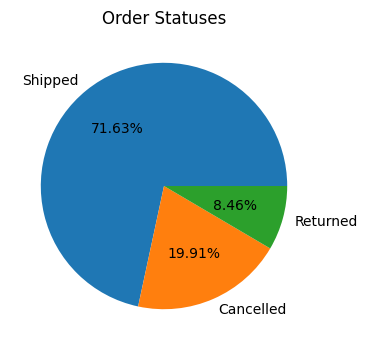

In [32]:
values= data['OrderStatus'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(values, labels=values.index,autopct='%1.2f%%' )
plt.title('Order Statuses')
plt.show()

- The pie chart indicates that the vast majority of orders are shipped (71.63%), with smaller portions being cancelled (19.91%) or returned (8.46%).

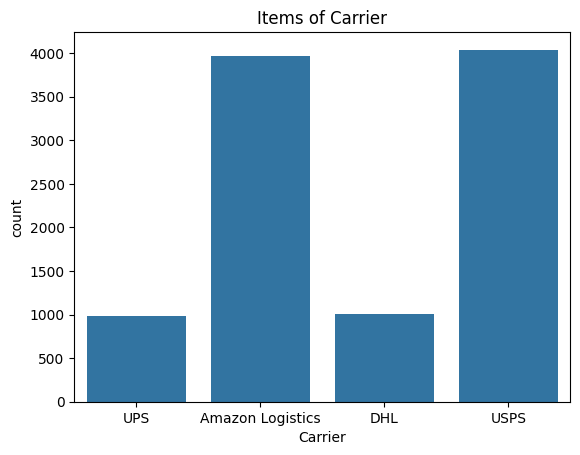

In [34]:
sns.countplot(x='Carrier',data=data)
plt.title("Items of Carrier")
plt.show()


- This bar chart shows the count of items shipped by different carriers, with Amazon Logistics and USPS having the highest counts.

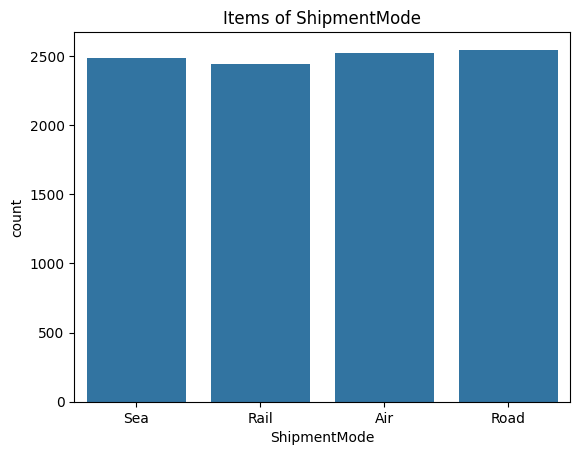

In [36]:
sns.countplot(x='ShipmentMode',data=data)
plt.title("Items of ShipmentMode")
plt.show()


- This bar chart displays a nearly equal count of items shipped across different shipment modes: Sea, Rail, Air, and Road.

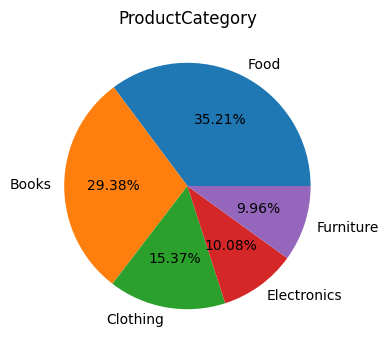

In [38]:
value = data['ProductCategory'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(value, labels=value.index,autopct='%1.2f%%' )
plt.title('ProductCategory')
plt.show()

- This pie chart shows the distribution of items by product category, with Food and Books being the largest categories.

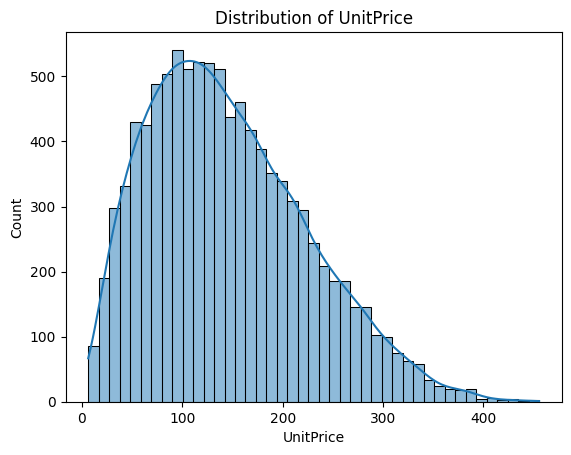

In [40]:
sns.histplot(data['UnitPrice'], kde=True)
plt.title('Distribution of UnitPrice')
plt.show()

- The histogram of UnitPrice shows a right-skewed distribution, indicating that most unit prices are concentrated at lower values with a long tail towards higher prices.

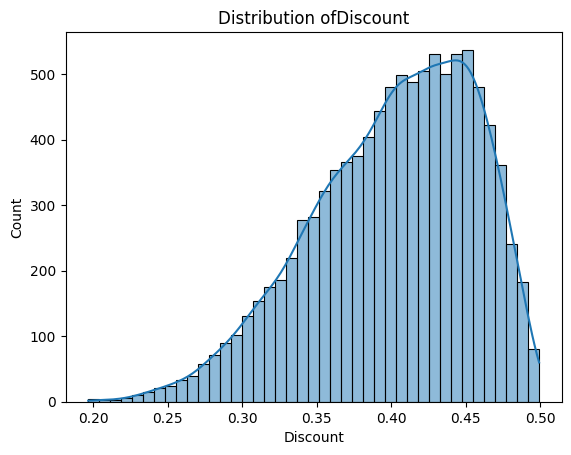

In [42]:
sns.histplot(data['Discount'], kde=True)
plt.title('Distribution ofDiscount')
plt.show()

- The plot shows a right-skewed distribution of discounts, with a peak around 0.45. This indicates that most discounts are relatively small , while a few are much larger.

### Bivariate Analysis

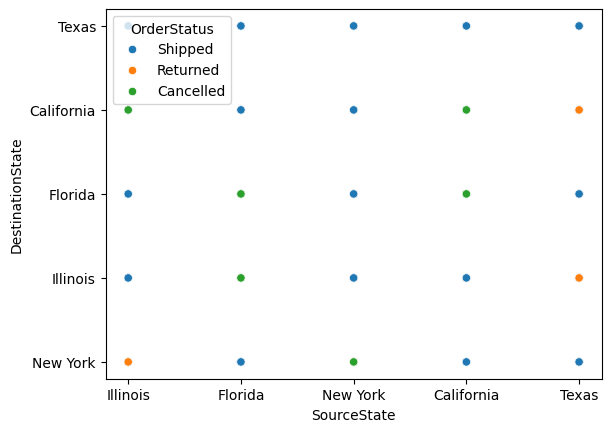

In [45]:
sns.scatterplot(x='SourceState', y='DestinationState', data=data,hue='OrderStatus')
plt.show()

- Each point represents a specific order status between a source state on the x-axis and a destination state on the y-axis, which suggests that both columns are not significant for prediction.

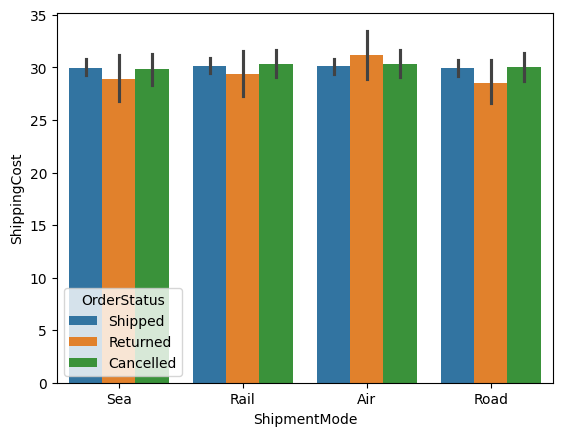

In [47]:
sns.barplot(x='ShipmentMode', y='ShippingCost', data=data,hue='OrderStatus')
plt.show()

- The bar plot shows that the shipping cost is relatively consistent across different shipment modes, regardless of whether the order was shipped, returned, or canceled.

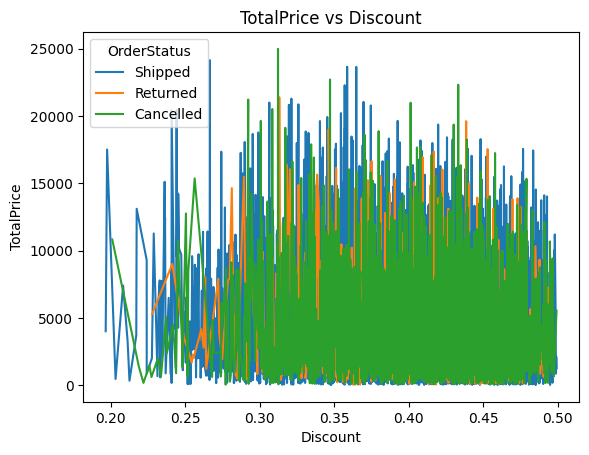

In [49]:
sns.lineplot(x='Discount', y='TotalPrice', data=data, hue='OrderStatus')
plt.title('TotalPrice vs Discount')
plt.show()

- The scatter plot indicates that orders with higher discounts tend to have a wide range of total prices, with a significant number of cancellations observed across the discount spectrum.

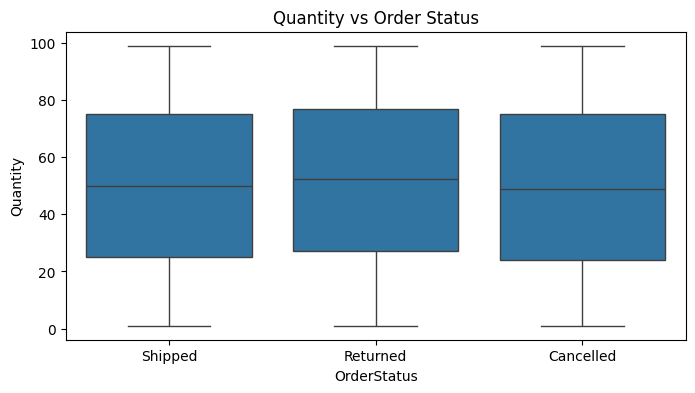

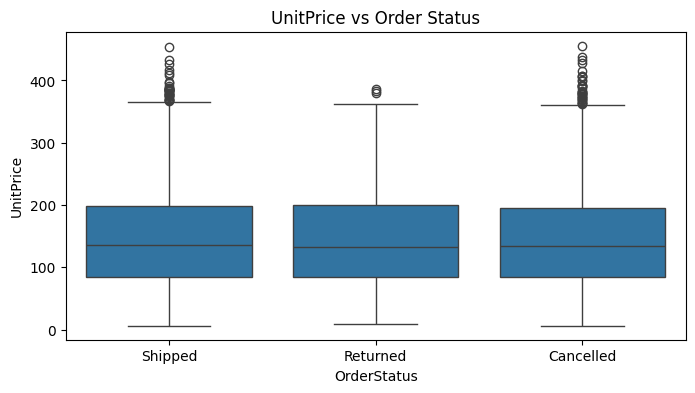

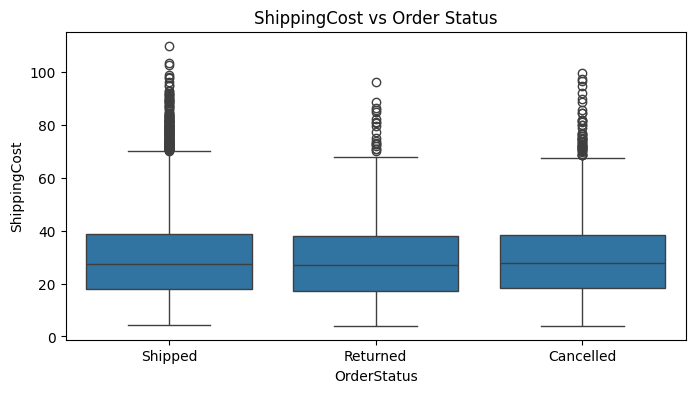

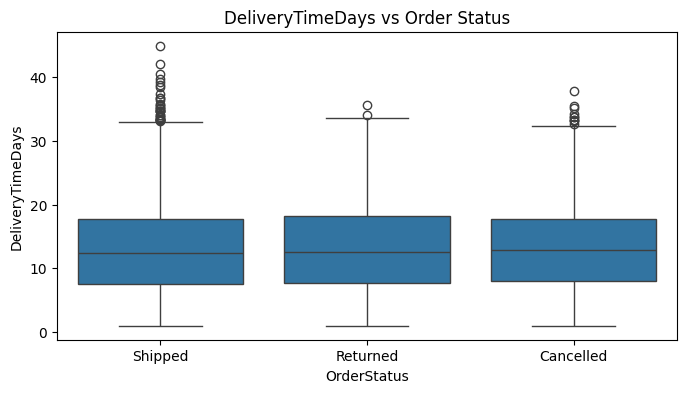

In [51]:
numeric_cols = ['Quantity', 'UnitPrice','ShippingCost', 'DeliveryTimeDays']

for feature in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='OrderStatus', y=feature, data=data)
    plt.title(f'{feature} vs Order Status')
    plt.show()
    

- There are signs of outliers that need to be handled

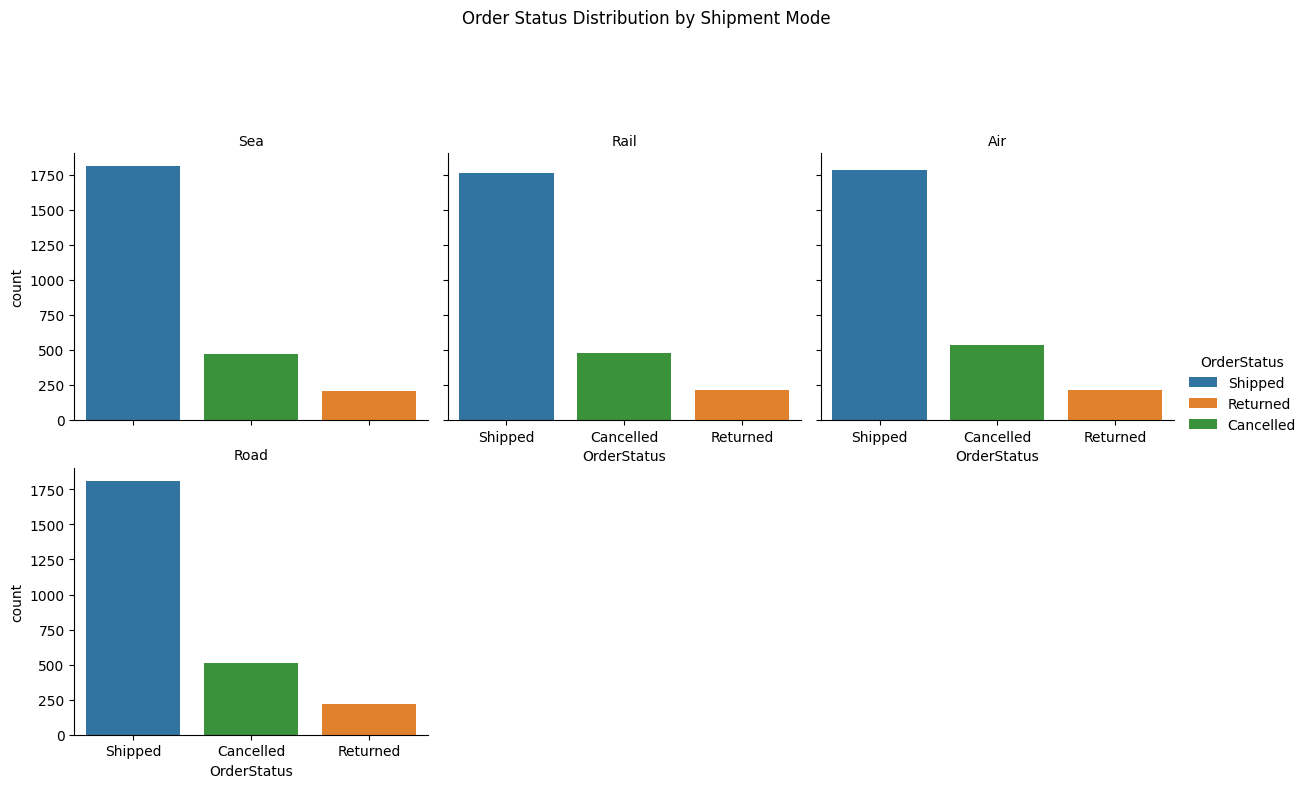

In [53]:
g = sns.FacetGrid(data, col='ShipmentMode', hue='OrderStatus', col_wrap=3, height=4)
g.map(sns.countplot, 'OrderStatus', order=data['OrderStatus'].value_counts().index)
g.add_legend()
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.8)  # Adjust the top space
g.fig.suptitle('Order Status Distribution by Shipment Mode')
plt.show()


- The plot shows that the most common order status for all shipment modes is 'shipped',followed by 'Cancelled' and 'Returned'

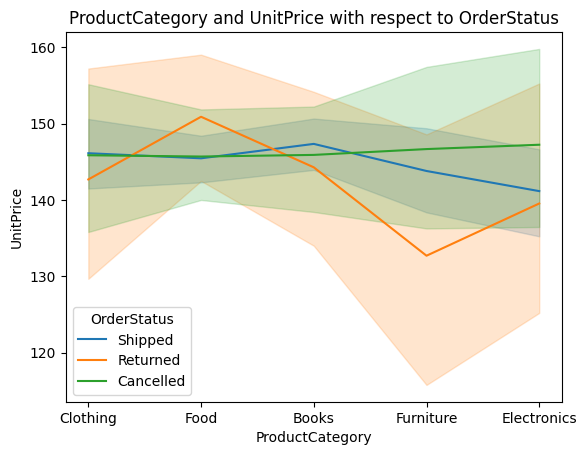

In [55]:
sns.lineplot(data=data, x="ProductCategory",y="UnitPrice", hue=data["OrderStatus"])
plt.title("ProductCategory and UnitPrice with respect to OrderStatus")
plt.show()

- The plot shows that the average unit price of products varies by product category and order status.
- For example, the average unit price of clothing is higher than that of food, regardless of order status.
- Additionally, the average unit price of returned orders is generally higher than that of shipped orders.

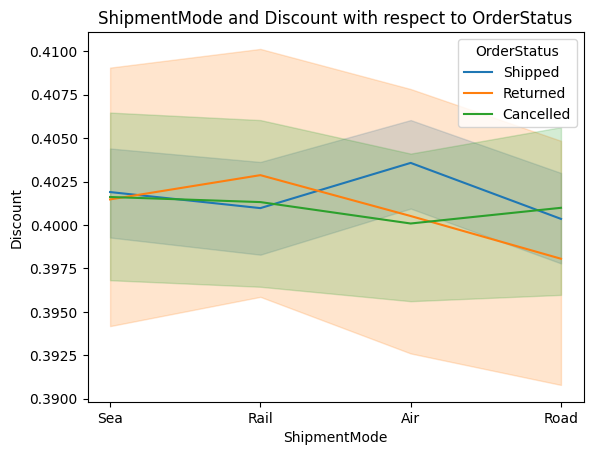

In [57]:
sns.lineplot(data=data, x="ShipmentMode",y="Discount", hue=data["OrderStatus"])
plt.title("ShipmentMode and Discount with respect to OrderStatus")
plt.show()

- The plot shows that the average discount offered varies by both shipment mode and order status.
- For example, the average discount for shipped orders is higher for sea and rail shipments compared to air and road shipments.
- Additionally, the average discount for returned orders is generally higher than that of shipped orders

### Mulitvariate Analysis

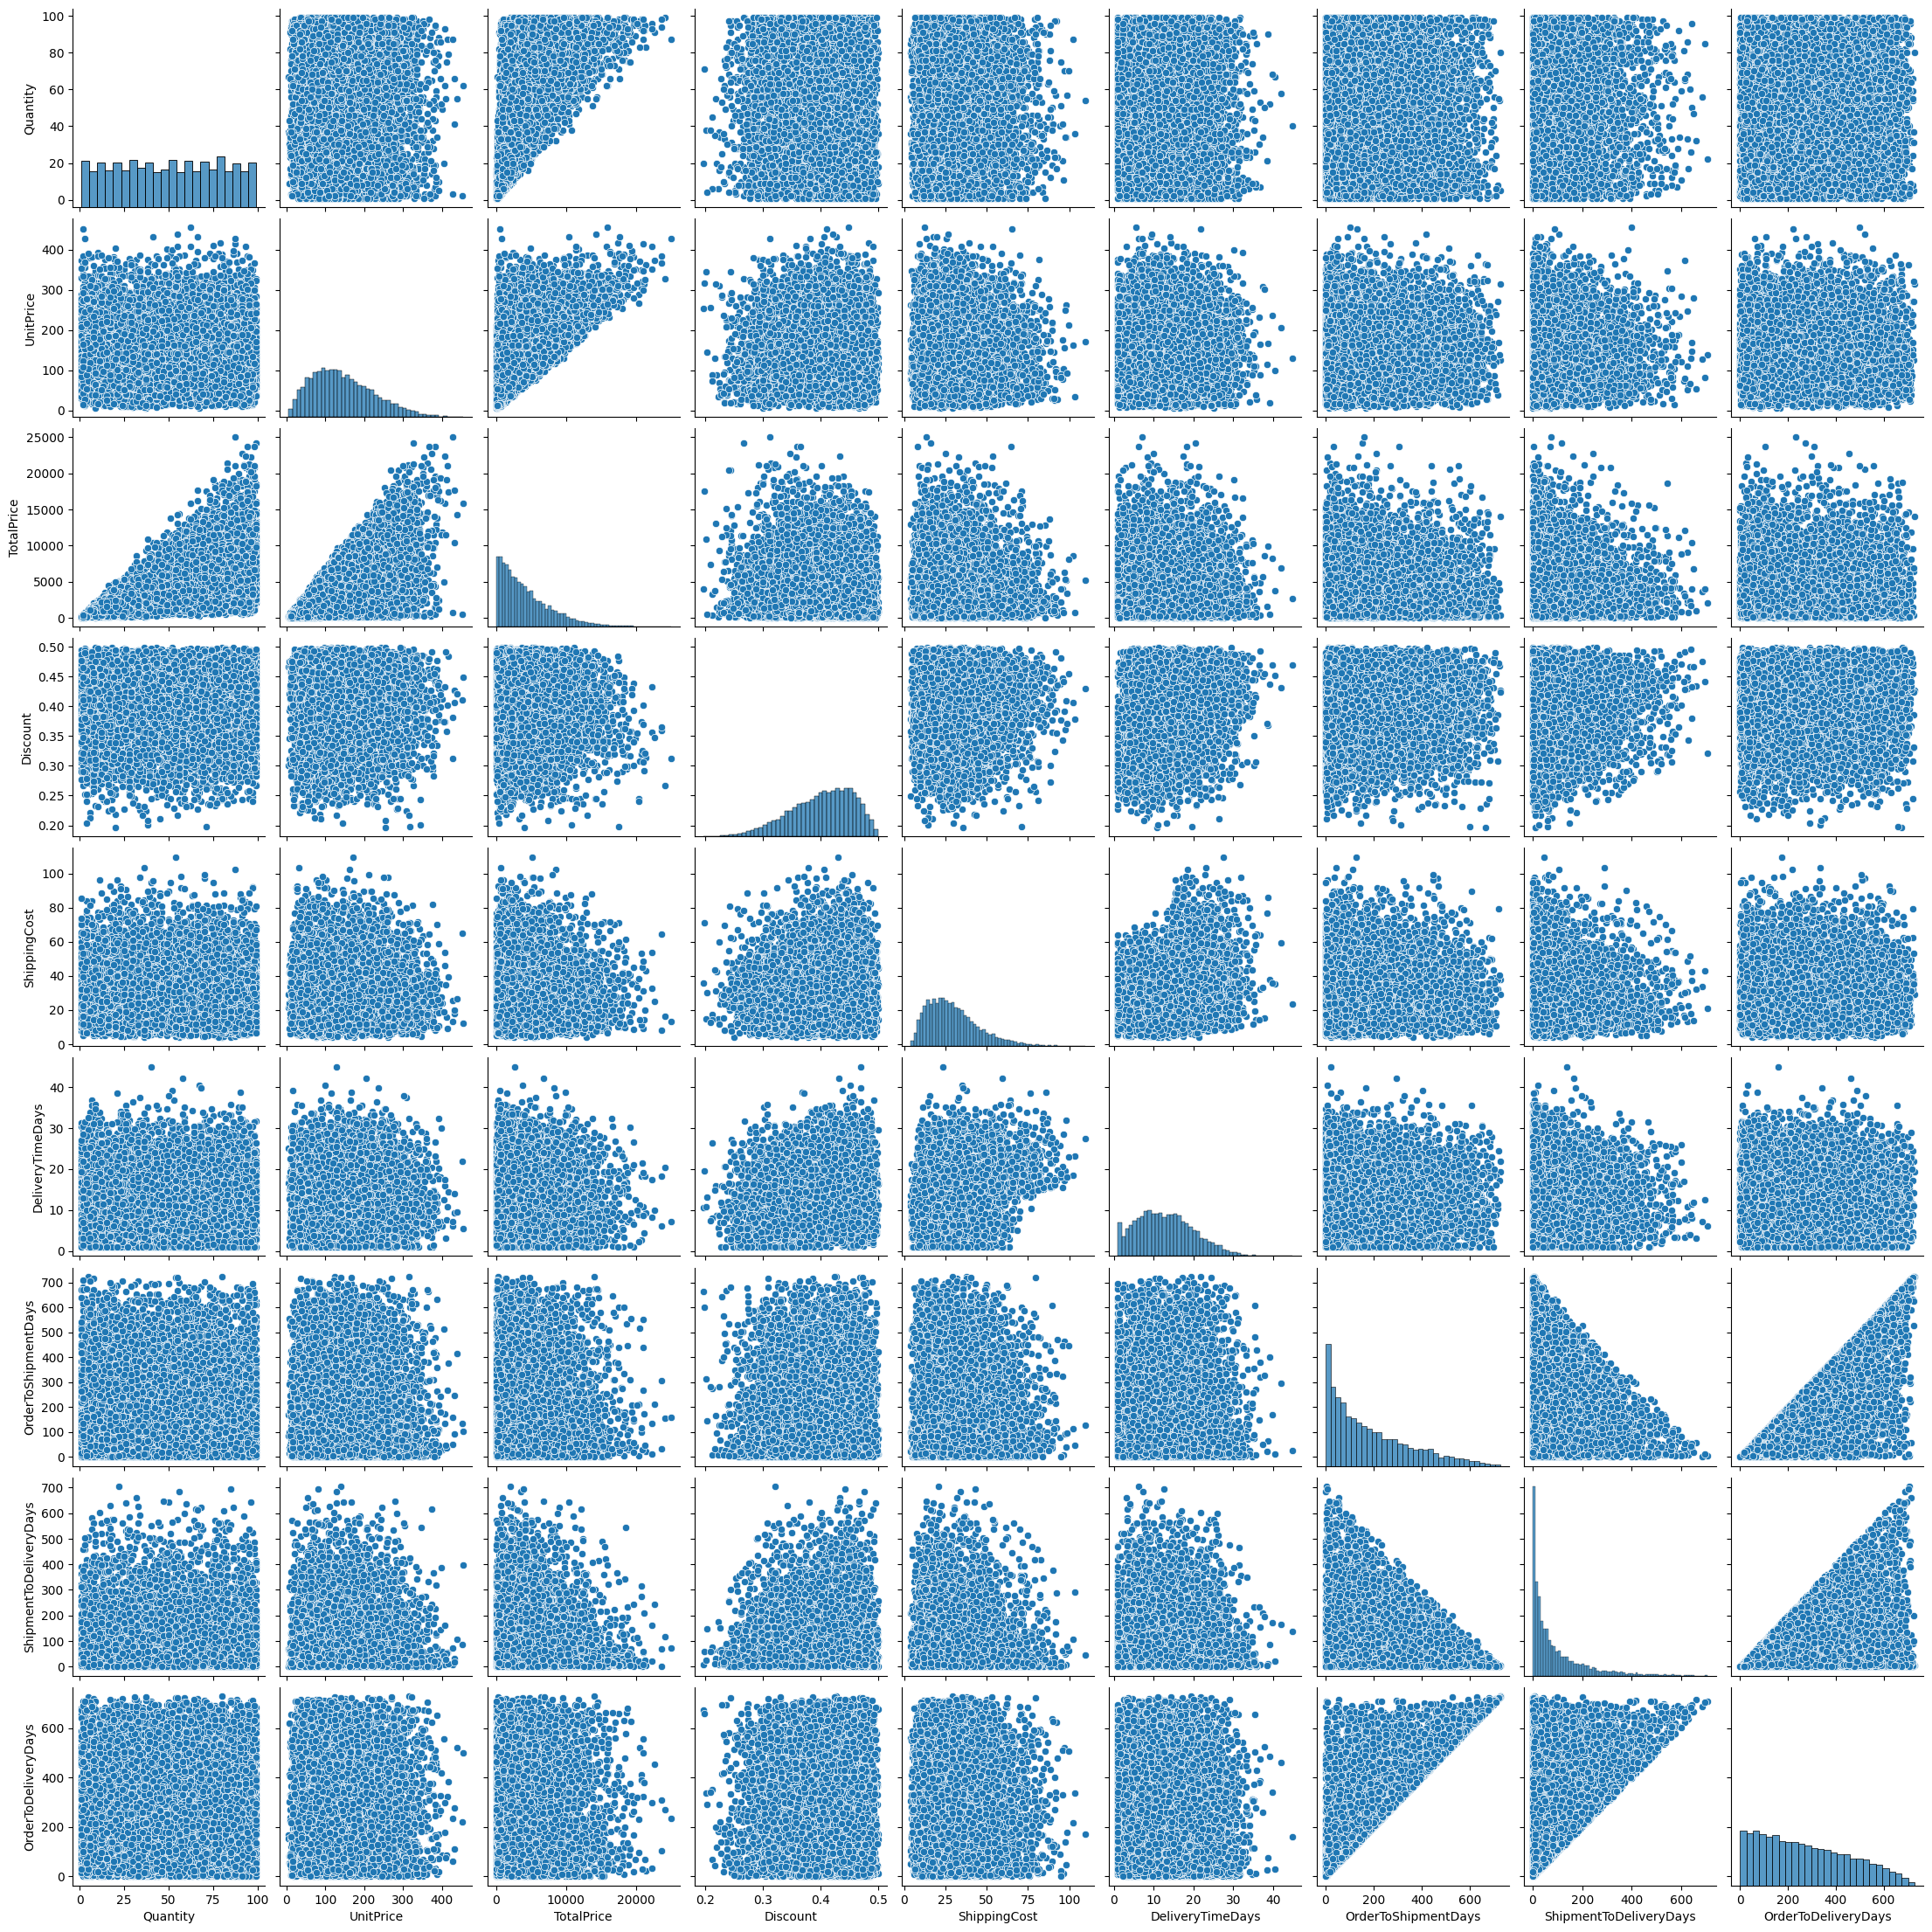

In [60]:
sns.pairplot(data)
plt.show()

- A combination of scatterplot for all columns for better understanding

In [62]:

non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)


Index(['ShipmentMode', 'ProductCategory', 'OrderStatus', 'SourceState',
       'DestinationState', 'Carrier'],
      dtype='object')


In [63]:
data_numeric = data.drop(columns=non_numeric_columns)


In [64]:
corr = data_numeric.corr()
print(corr)


                        Quantity  UnitPrice  TotalPrice  Discount  \
Quantity                1.000000  -0.003888    0.669956 -0.002129   
UnitPrice              -0.003888   1.000000    0.629255  0.017235   
TotalPrice              0.669956   0.629255    1.000000 -0.092298   
Discount               -0.002129   0.017235   -0.092298  1.000000   
ShippingCost           -0.008063  -0.007867   -0.005329  0.009540   
DeliveryTimeDays       -0.008841   0.001321   -0.016011  0.182258   
OrderToShipmentDays    -0.000197   0.000996    0.000861 -0.005991   
ShipmentToDeliveryDays -0.008338   0.009104   -0.002581  0.003127   
OrderToDeliveryDays    -0.005013   0.006159   -0.000741 -0.003451   

                        ShippingCost  DeliveryTimeDays  OrderToShipmentDays  \
Quantity                   -0.008063         -0.008841            -0.000197   
UnitPrice                  -0.007867          0.001321             0.000996   
TotalPrice                 -0.005329         -0.016011             0.000

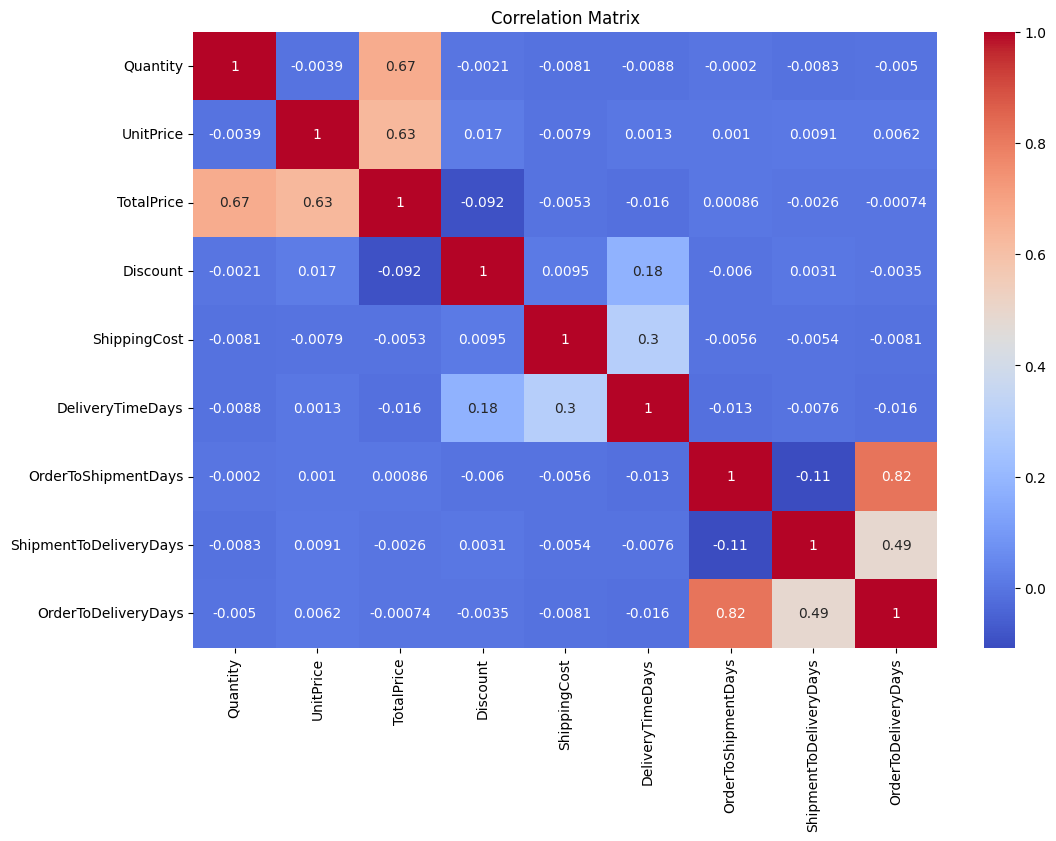

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix shows that TotalPrice is closely related to both Quantity and UnitPrice.
-  while the time between order and delivery is largely influenced by shipment time.
-   Other variables, like Discount and ShippingCost, have weak relationships with the rest.

### Data Preprocessing

In [68]:
data= data.drop(columns=['SourceState','DestinationState','Carrier','TotalPrice'])


### Outliers Handling

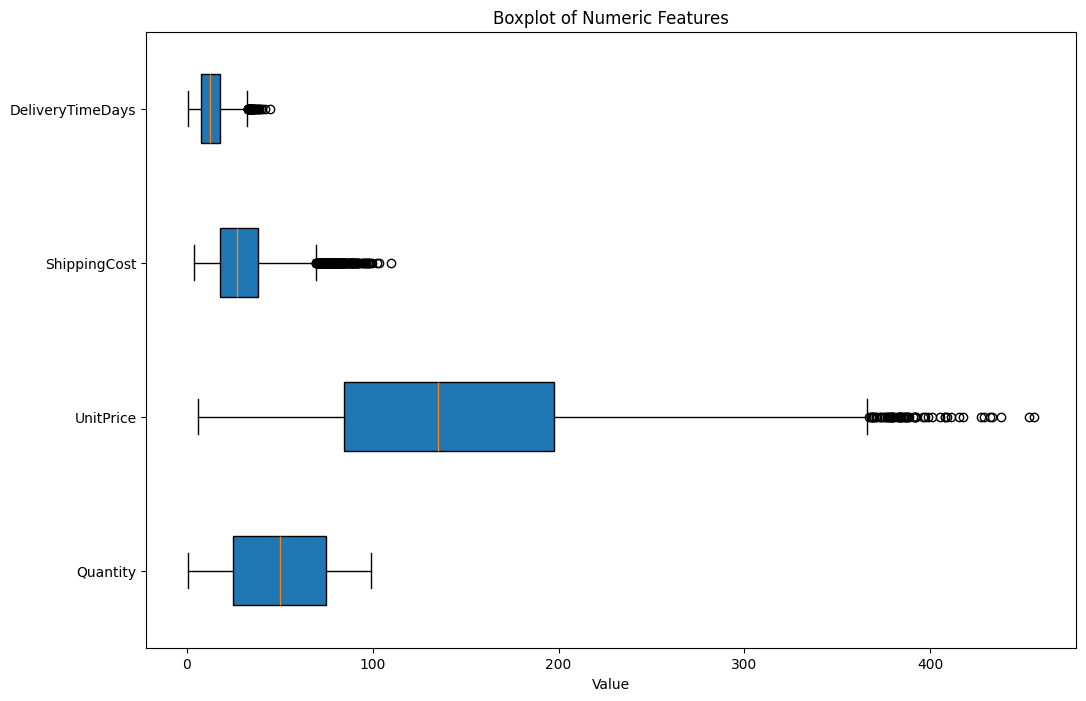

In [70]:

numeric_cols = ['Quantity', 'UnitPrice','ShippingCost', 'DeliveryTimeDays']

plt.figure(figsize=(12, 8))
plt.boxplot([data[col].dropna() for col in numeric_cols], vert=False, patch_artist=True)
plt.yticks(range(1, len(numeric_cols) + 1), numeric_cols)
plt.title('Boxplot of Numeric Features')
plt.xlabel('Value')
plt.show()


- While the 'Quantity' column shows no signs of outliers, the columns 'UnitPrice,' 'ShippingCost,' and 'DeliveryTimeDays' do exhibit outliers.

<Axes: ylabel='Discount'>

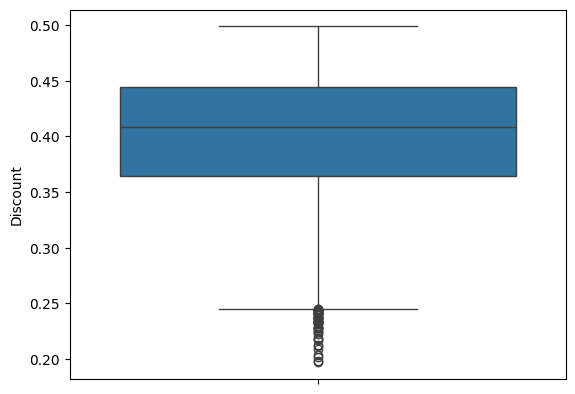

In [72]:
sns.boxplot(data['Discount'])

- The 'Discount' column shows outliers that need to be handled.

In [74]:
columns = ['UnitPrice', 'Discount', 'ShippingCost', 'DeliveryTimeDays']


In [75]:
outliers_dict = {}
for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)
    print('##############################')
    print(f"{col} - Upper Limit: {upper_limit}")
    print(f"{col} - Lower Limit: {lower_limit}")
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    outliers_dict[col] = outliers
    print('')

##############################
UnitPrice - Upper Limit: 366.761884393698
UnitPrice - Lower Limit: -84.55191425615583

##############################
Discount - Upper Limit: 0.5648119777678304
Discount - Lower Limit: 0.24476689524627154

##############################
ShippingCost - Upper Limit: 69.50222727738311
ShippingCost - Lower Limit: -12.975286663419226

##############################
DeliveryTimeDays - Upper Limit: 33.01119862382892
DeliveryTimeDays - Lower Limit: -7.585854584391643



In [76]:
print(outliers_dict['UnitPrice'])

     ShipmentMode ProductCategory  Quantity   UnitPrice  Discount  \
215           Sea       Furniture        32  376.791262  0.292781   
233           Air        Clothing        94  383.375353  0.358633   
303          Road           Books        20  368.078573  0.449763   
509           Sea       Furniture        10  392.184114  0.376473   
534          Road           Books        62  455.657222  0.448195   
...           ...             ...       ...         ...       ...   
9109         Road           Books        55  438.114480  0.421356   
9145          Sea            Food         3  368.602794  0.406797   
9151          Air        Clothing        70  380.643008  0.454283   
9805         Rail           Books        93  407.683136  0.433141   
9969          Sea     Electronics         2  453.063410  0.410788   

      ShippingCost OrderStatus  DeliveryTimeDays  OrderToShipmentDays  \
215      49.369094     Shipped          4.837534                  210   
233       8.096071     Sh

In [77]:
print(outliers_dict['Discount'])

     ShipmentMode ProductCategory  Quantity   UnitPrice  Discount  \
240           Air        Clothing        68  173.697829  0.240624   
645           Sea       Furniture        20   87.216108  0.218859   
926          Road           Books        20  254.445205  0.196679   
1214          Sea            Food        45   89.227648  0.211370   
1347         Rail            Food        86  141.887398  0.241355   
1391         Rail        Clothing        74  214.280692  0.244141   
1565         Road            Food        71  317.267230  0.197628   
1737          Air           Books         6   34.609062  0.221998   
2052         Road     Electronics        37  309.614719  0.224172   
2282         Road            Food        91  166.700660  0.244081   
2473         Road        Clothing        14  153.387074  0.240765   
2489         Road           Books        18  344.396311  0.243041   
2513          Sea            Food        13  126.660309  0.243755   
2747         Road     Electronics 

In [78]:
print(outliers_dict['ShippingCost'])

     ShipmentMode ProductCategory  Quantity   UnitPrice  Discount  \
98           Road        Clothing        66   79.225148  0.340019   
200          Road            Food        81  115.727096  0.442420   
302          Rail           Books        81  108.710266  0.321918   
341          Road        Clothing        40   98.060364  0.437493   
358           Sea        Clothing        83  250.591084  0.468410   
...           ...             ...       ...         ...       ...   
9767          Sea     Electronics        66   91.958502  0.365444   
9793          Air        Clothing        69   92.632494  0.434147   
9868          Sea           Books        38  219.567499  0.419149   
9916          Air            Food        40  158.752929  0.355057   
9973         Road            Food        81  300.120081  0.435897   

      ShippingCost OrderStatus  DeliveryTimeDays  OrderToShipmentDays  \
98       75.806466   Cancelled         24.885410                  514   
200      88.724557     Sh

In [79]:
print(outliers_dict['DeliveryTimeDays'])

     ShipmentMode ProductCategory  Quantity   UnitPrice  Discount  \
593           Air     Electronics        26  107.249102  0.443738   
885           Air           Books        52   17.593361  0.436778   
1889         Rail            Food         9  128.936087  0.444432   
2152         Rail            Food        53  163.911379  0.457942   
2198         Road           Books        11  245.431308  0.485650   
2353         Road        Clothing        63  114.517604  0.420275   
2481          Air            Food        40  128.733740  0.469465   
2575         Road           Books        90  167.202113  0.368249   
2788          Sea            Food        75  152.874931  0.463650   
2809          Air            Food         7   87.413116  0.492030   
2902          Sea           Books        34  308.286213  0.449801   
3079          Sea           Books        85   28.107430  0.454696   
3308          Air           Books        67   98.624288  0.450888   
3598          Sea           Books 

In [80]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=0.05)

In [81]:
df=winsorizer.fit_transform(data[[ 'UnitPrice', 'Discount', 'ShippingCost', 'DeliveryTimeDays']])

In [82]:
df

UnitPrice  Discount  ShippingCost  DeliveryTimeDays
0     137.409500  0.400038     32.741196         14.336462
1     203.160632  0.362907     39.604128         18.294767
2      79.232419  0.448796     39.604128         18.294767
3     129.213693  0.433729     39.604128         18.294767
4      79.049338  0.448796     39.604128         11.256788
...          ...       ...           ...               ...
9995  108.769005  0.448796     16.922812          7.130577
9996  203.160632  0.448604     16.922812         14.964137
9997  185.849748  0.360783     29.305227         12.651363
9998   94.187835  0.448796     24.072581         18.058008
9999  114.355553  0.360783     39.604128          7.928450

[10000 rows x 4 columns]

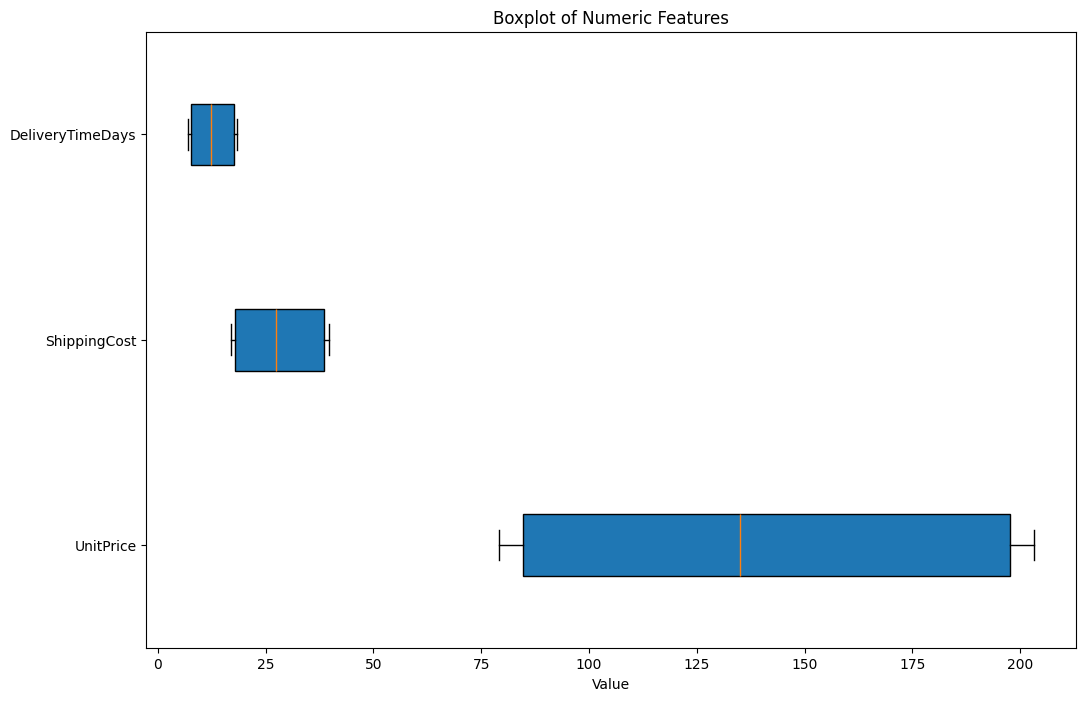

In [83]:
numeric_cols = ['UnitPrice','ShippingCost', 'DeliveryTimeDays']

plt.figure(figsize=(12, 8))
plt.boxplot([df[col].dropna() for col in numeric_cols], vert=False, patch_artist=True)
plt.yticks(range(1, len(numeric_cols) + 1), numeric_cols)
plt.title('Boxplot of Numeric Features')
plt.xlabel('Value')
plt.show()


<Axes: ylabel='Discount'>

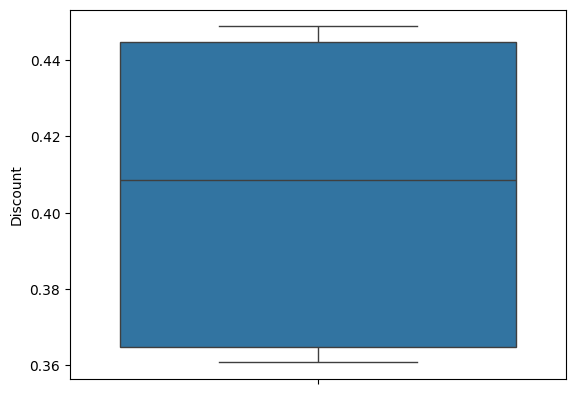

In [84]:
sns.boxplot(df['Discount'])

- we have removed all outliers from the columns

In [86]:
data_dropped=data.drop([ 'UnitPrice',  'Discount', 'ShippingCost', 'DeliveryTimeDays'],axis=1)

In [87]:
Data=pd.concat([data_dropped, df], axis=1)

In [88]:
Data.head()

ShipmentMode ProductCategory  Quantity OrderStatus  OrderToShipmentDays  \
0          Sea        Clothing        90     Shipped                  502   
1         Rail        Clothing        38     Shipped                   58   
2          Air        Clothing        12     Shipped                  364   
3         Rail            Food        90     Shipped                  490   
4          Air            Food        50     Shipped                  104   

   ShipmentToDeliveryDays  OrderToDeliveryDays   UnitPrice  Discount  \
0                      91                  593  137.409500  0.400038   
1                     221                  279  203.160632  0.362907   
2                     119                  483   79.232419  0.448796   
3                     112                  602  129.213693  0.433729   
4                      49                  153   79.049338  0.448796   

   ShippingCost  DeliveryTimeDays  
0     32.741196         14.336462  
1     39.604128         18.294767  
2     39.604128         18.294767  
3     39.604128         18.294767  
4     39.604128         11.256788

In [89]:
Data.shape

(10000, 11)

### Categorical Handling

In [91]:

label_encoder = LabelEncoder()

In [92]:
Data['ShipmentMode'] = label_encoder.fit_transform(Data['ShipmentMode'])

In [93]:
Data['ProductCategory'] = label_encoder.fit_transform(Data['ProductCategory'])

In [94]:
Data['OrderStatus'] = label_encoder.fit_transform(Data['OrderStatus'])

In [95]:
Data.head()

ShipmentMode  ProductCategory  Quantity  OrderStatus  OrderToShipmentDays  \
0             3                1        90            2                  502   
1             1                1        38            2                   58   
2             0                1        12            2                  364   
3             1                3        90            2                  490   
4             0                3        50            2                  104   

   ShipmentToDeliveryDays  OrderToDeliveryDays   UnitPrice  Discount  \
0                      91                  593  137.409500  0.400038   
1                     221                  279  203.160632  0.362907   
2                     119                  483   79.232419  0.448796   
3                     112                  602  129.213693  0.433729   
4                      49                  153   79.049338  0.448796   

   ShippingCost  DeliveryTimeDays  
0     32.741196         14.336462  
1     39.604128         18.294767  
2     39.604128         18.294767  
3     39.604128         18.294767  
4     39.604128         11.256788

### Scaling

In [97]:
features = Data.drop(columns=['OrderStatus'])
target = Data['OrderStatus']


In [98]:

scaler = MinMaxScaler()
standardized_features = scaler.fit_transform(features)
df1 = pd.DataFrame(standardized_features, columns=features.columns)
df1['OrderStatus'] = target

df1

ShipmentMode  ProductCategory  Quantity  OrderToShipmentDays  \
0         1.000000             0.25  0.908163             0.693370   
1         0.333333             0.25  0.377551             0.080110   
2         0.000000             0.25  0.112245             0.502762   
3         0.333333             0.75  0.908163             0.676796   
4         0.000000             0.75  0.500000             0.143646   
...            ...              ...       ...                  ...   
9995      1.000000             0.75  0.010204             0.325967   
9996      0.666667             0.75  0.010204             0.117403   
9997      0.666667             0.75  0.285714             0.117403   
9998      0.333333             0.25  0.326531             0.091160   
9999      0.333333             0.00  0.755102             0.233425   

      ShipmentToDeliveryDays  OrderToDeliveryDays  UnitPrice  Discount  \
0                   0.129078             0.812329   0.470224  0.446018   
1                   0.313475             0.382192   1.000000  0.024129   
2                   0.168794             0.661644   0.001475  1.000000   
3                   0.158865             0.824658   0.404188  0.828815   
4                   0.069504             0.209589   0.000000  1.000000   
...                      ...                  ...        ...       ...   
9995                0.051064             0.372603   0.239460  1.000000   
9996                0.019858             0.135616   1.000000  0.997825   
9997                0.594326             0.690411   0.860521  0.000000   
9998                0.012766             0.102740   0.121975  1.000000   
9999                0.069504             0.298630   0.284472  0.000000   

      ShippingCost  DeliveryTimeDays  OrderStatus  
0         0.697419          0.645446            2  
1         1.000000          1.000000            2  
2         1.000000          1.000000            2  
3         1.000000          1.000000            2  
4         1.000000          0.369593            2  
...            ...               ...          ...  
9995      0.000000          0.000000            2  
9996      0.000000          0.701668            2  
9997      0.545930          0.494508            0  
9998      0.315227          0.978793            2  
9999      1.000000          0.071467            0  

[10000 rows x 11 columns]

In [99]:
df1["OrderStatus"]=df1["OrderStatus"].astype("int")

In [100]:
df1.dtypes

ShipmentMode              float64
ProductCategory           float64
Quantity                  float64
OrderToShipmentDays       float64
ShipmentToDeliveryDays    float64
OrderToDeliveryDays       float64
UnitPrice                 float64
Discount                  float64
ShippingCost              float64
DeliveryTimeDays          float64
OrderStatus                 int32
dtype: object

### Splitting the data

In [102]:
X = df1.drop('OrderStatus',axis=1) 
y = df1['OrderStatus']

In [103]:
X

ShipmentMode  ProductCategory  Quantity  OrderToShipmentDays  \
0         1.000000             0.25  0.908163             0.693370   
1         0.333333             0.25  0.377551             0.080110   
2         0.000000             0.25  0.112245             0.502762   
3         0.333333             0.75  0.908163             0.676796   
4         0.000000             0.75  0.500000             0.143646   
...            ...              ...       ...                  ...   
9995      1.000000             0.75  0.010204             0.325967   
9996      0.666667             0.75  0.010204             0.117403   
9997      0.666667             0.75  0.285714             0.117403   
9998      0.333333             0.25  0.326531             0.091160   
9999      0.333333             0.00  0.755102             0.233425   

      ShipmentToDeliveryDays  OrderToDeliveryDays  UnitPrice  Discount  \
0                   0.129078             0.812329   0.470224  0.446018   
1                   0.313475             0.382192   1.000000  0.024129   
2                   0.168794             0.661644   0.001475  1.000000   
3                   0.158865             0.824658   0.404188  0.828815   
4                   0.069504             0.209589   0.000000  1.000000   
...                      ...                  ...        ...       ...   
9995                0.051064             0.372603   0.239460  1.000000   
9996                0.019858             0.135616   1.000000  0.997825   
9997                0.594326             0.690411   0.860521  0.000000   
9998                0.012766             0.102740   0.121975  1.000000   
9999                0.069504             0.298630   0.284472  0.000000   

      ShippingCost  DeliveryTimeDays  
0         0.697419          0.645446  
1         1.000000          1.000000  
2         1.000000          1.000000  
3         1.000000          1.000000  
4         1.000000          0.369593  
...            ...               ...  
9995      0.000000          0.000000  
9996      0.000000          0.701668  
9997      0.545930          0.494508  
9998      0.315227          0.978793  
9999      1.000000          0.071467  

[10000 rows x 10 columns]

#### Imbalanced Handling¶

In [105]:
smote = SMOTE(random_state=42)
x_sample, y_sample = smote.fit_resample(X, y)

In [106]:
x_sample


ShipmentMode  ProductCategory  Quantity  OrderToShipmentDays  \
0          1.000000         0.250000  0.908163             0.693370   
1          0.333333         0.250000  0.377551             0.080110   
2          0.000000         0.250000  0.112245             0.502762   
3          0.333333         0.750000  0.908163             0.676796   
4          0.000000         0.750000  0.500000             0.143646   
...             ...              ...       ...                  ...   
21484      1.000000         0.750000  0.804818             0.659857   
21485      0.000000         1.000000  0.550963             0.108020   
21486      0.333333         0.131825  0.399631             0.572504   
21487      0.333333         0.774783  0.200035             0.046664   
21488      0.104315         0.578236  0.401080             0.284243   

       ShipmentToDeliveryDays  OrderToDeliveryDays  UnitPrice  Discount  \
0                    0.129078             0.812329   0.470224  0.446018   
1                    0.313475             0.382192   1.000000  0.024129   
2                    0.168794             0.661644   0.001475  1.000000   
3                    0.158865             0.824658   0.404188  0.828815   
4                    0.069504             0.209589   0.000000  1.000000   
...                       ...                  ...        ...       ...   
21484                0.069224             0.721287   0.000000  0.671973   
21485                0.245710             0.344428   1.000000  0.087985   
21486                0.131625             0.694916   0.006134  0.967351   
21487                0.086811             0.130118   0.960455  0.383025   
21488                0.067181             0.346788   0.625745  0.955886   

       ShippingCost  DeliveryTimeDays  
0          0.697419          0.645446  
1          1.000000          1.000000  
2          1.000000          1.000000  
3          1.000000          1.000000  
4          1.000000          0.369593  
...             ...               ...  
21484      0.029198          0.008621  
21485      0.420675          0.499251  
21486      0.883454          0.888919  
21487      0.840855          0.369360  
21488      0.559635          0.000000  

[21489 rows x 10 columns]

In [107]:
y_sample.value_counts()

OrderStatus
2    7163
1    7163
0    7163
Name: count, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

In [109]:
y_test.value_counts()

OrderStatus
0    1453
1    1446
2    1399
Name: count, dtype: int64

In [110]:
y_train.value_counts()

OrderStatus
2    5764
1    5717
0    5710
Name: count, dtype: int64

In [111]:
X_train


ShipmentMode  ProductCategory  Quantity  OrderToShipmentDays  \
12088      0.000000         0.000000  0.482582             0.285236   
9566       1.000000         0.750000  0.102041             0.058011   
18500      0.666667         0.750000  0.297129             0.130984   
4045       0.000000         0.000000  0.224490             0.516575   
20751      0.575764         0.931823  0.100187             0.183949   
...             ...              ...       ...                  ...   
11284      0.908442         0.931332  0.143864             0.078207   
11964      1.000000         0.000000  0.550231             0.141533   
5390       1.000000         1.000000  0.520408             0.679558   
860        0.666667         0.750000  0.367347             0.211326   
15795      1.000000         0.750000  0.663479             0.072834   

       ShipmentToDeliveryDays  OrderToDeliveryDays  UnitPrice  Discount  \
12088                0.033648             0.315387   0.265543  1.000000   
9566                 0.055319             0.110959   0.234069  1.000000   
18500                0.021274             0.150453   0.117005  0.011012   
4045                 0.041135             0.552055   0.519042  0.071722   
20751                0.093875             0.273097   0.025455  0.078390   
...                       ...                  ...        ...       ...   
11284                0.454095             0.516108   0.908921  0.963207   
11964                0.021062             0.160710   0.000000  0.406489   
5390                 0.024113             0.697260   0.695857  0.678912   
860                  0.205674             0.408219   0.968631  0.000000   
15795                0.095292             0.164264   0.231983  0.000000   

       ShippingCost  DeliveryTimeDays  
12088      1.000000          1.000000  
9566       0.524048          1.000000  
18500      0.448508          0.515099  
4045       1.000000          0.478043  
20751      0.405083          0.830388  
...             ...               ...  
11284      0.988994          0.317876  
11964      0.526603          0.269815  
5390       0.841878          0.903751  
860        1.000000          0.704272  
15795      1.000000          1.000000  

[17191 rows x 10 columns]

In [112]:
y_train

12088    0
9566     0
18500    1
4045     2
20751    1
        ..
11284    0
11964    0
5390     0
860      2
15795    1
Name: OrderStatus, Length: 17191, dtype: int32

In [113]:
X_test

ShipmentMode  ProductCategory  Quantity  OrderToShipmentDays  \
17135      1.000000         0.056908  0.861372             0.069566   
13768      0.666667         0.750000  0.295780             0.055267   
18837      0.624780         0.781415  0.790951             0.097582   
17281      0.333333         0.000000  0.814507             0.629588   
4398       0.000000         0.000000  0.551020             0.022099   
...             ...              ...       ...                  ...   
5391       0.000000         0.750000  0.836735             0.604972   
11909      0.594249         0.750000  0.240464             0.312891   
2101       0.333333         0.750000  0.744898             0.121547   
15785      0.000000         0.000000  0.755233             0.124628   
4197       0.000000         1.000000  0.408163             0.465470   

       ShipmentToDeliveryDays  OrderToDeliveryDays  UnitPrice  Discount  \
17135                0.093096             0.158902   0.199348  1.000000   
13768                0.752655             0.781692   0.000000  0.390422   
18837                0.046349             0.141542   0.079710  0.057558   
17281                0.106515             0.727280   1.000000  0.974961   
4398                 0.000000             0.021918   0.000000  0.545623   
...                       ...                  ...        ...       ...   
5391                 0.012766             0.612329   0.000000  0.961042   
11909                0.083203             0.390673   1.000000  0.928590   
2101                 0.134752             0.250685   1.000000  0.000000   
15785                0.163466             0.281471   0.107947  0.902820   
4197                 0.451064             0.897260   0.000000  0.000000   

       ShippingCost  DeliveryTimeDays  
17135      0.168057          0.961260  
13768      1.000000          0.848450  
18837      0.021059          1.000000  
17281      0.949423          0.861602  
4398       1.000000          1.000000  
...             ...               ...  
5391       1.000000          0.251355  
11909      0.981982          0.011640  
2101       0.071388          0.000000  
15785      0.000000          1.000000  
4197       0.830879          0.105049  

[4298 rows x 10 columns]

In [114]:
y_test

17135    1
13768    0
18837    1
17281    1
4398     0
        ..
5391     2
11909    0
2101     1
15785    1
4197     2
Name: OrderStatus, Length: 4298, dtype: int32

### Model Building

In [116]:
model_1 = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
model_2= KNeighborsClassifier(metric='manhattan', n_neighbors= 10)
model_3=DecisionTreeClassifier(criterion='entropy',max_depth= 30,splitter= 'best',max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
model_4 = RandomForestClassifier(n_estimators=88, max_depth=15, random_state=50)
model_5=xgboost.XGBClassifier()
model_6 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model_7=GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, max_depth=5,min_samples_split= 5,subsample= 0.7, random_state=42)

### LogisticRegression





In [118]:

model_1.fit(X_train, y_train)


LogisticRegression(C=0.01, solver='liblinear')

In [119]:
y_sample_train1=model_1.predict(x_sample)
y_pred_train1= model_1.predict(X_train)
y_pred_test1=model_1.predict(X_test)

In [120]:

sample_acc1=accuracy_score(y_sample,y_sample_train1)
train_acc1= accuracy_score(y_train,y_pred_train1)
test_acc1=accuracy_score(y_test,y_pred_test1)

In [121]:
print("train Accuracy",train_acc1)
print("test Accuracy",test_acc1)
print("sample Accuracy", sample_acc1)

train Accuracy 0.3743237740678262
test Accuracy 0.3629595160539786
sample Accuracy 0.3720508166969147


In [122]:

print("cross_val_score",cross_val_score(model_1,X_test,y_test, cv=5).mean())

cross_val_score 0.35132170993854406


In [123]:
confusion_matrix(y_test,y_pred_test1)

array([[281, 596, 576],
       [216, 697, 533],
       [244, 573, 582]], dtype=int64)

### KNN

In [125]:
model_2.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [126]:
y_pred_train2= model_2.predict(X_train)
y_pred_test2=model_2.predict(X_test)
y_sample_train2=model_2.predict(x_sample)

In [127]:

train_acc2= accuracy_score(y_train,y_pred_train2)
test_acc2=accuracy_score(y_test,y_pred_test2)
sample_acc2=accuracy_score(y_sample,y_sample_train2)

In [128]:
print("train Accuracy",train_acc2)
print("test Accuracy",test_acc2)
print("sample Accuracy", sample_acc2)

train Accuracy 0.7688906986213716
test Accuracy 0.7117263843648208
sample Accuracy 0.7574573037367955


In [129]:

print("cross_val_score",cross_val_score(model_2,X_test,y_test, cv=5).mean())
print("cross_val_Sample",cross_val_score(model_1,x_sample,y_sample, cv=5).mean())

cross_val_score 0.5116341337953813
cross_val_Sample 0.37000342095890154


In [130]:
confusion_matrix(y_test,y_pred_test2)

array([[1173,  155,  125],
       [  45, 1385,   16],
       [ 477,  421,  501]], dtype=int64)

#### Hyperparametric tunning

In [132]:
knn = KNeighborsClassifier()

In [133]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [134]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [135]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [136]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.7976264966022124


In [137]:
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
train_accuracy = best_knn.score(X_train, y_train)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.8222429036761284
Train Accuracy: 1.0


- #### The parameters suggested by hyperparameter tuning are not working well, so we are considering using the previously used parameters.

### DecisionTreeClassifier

In [140]:

model_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')

In [141]:
y_pred_train3=model_3.predict(X_train)
y_pred_test3=model_3.predict(X_test)
y_sample_train3=model_3.predict(x_sample)

In [142]:
train_acc3=accuracy_score(y_train,y_pred_train3)
test_acc3=accuracy_score(y_test,y_pred_test3)
sample_acc3=accuracy_score(y_sample,y_sample_train3)
print("train_accuracy", train_acc3)
print("test accuraccy",test_acc3)
print("sample Accuracy", sample_acc3)

train_accuracy 0.9997091501366995
test accuraccy 0.6421591437878083
sample Accuracy 0.9281958211177812


In [143]:

print("cross_val_score",cross_val_score(model_3,X_test,y_test, cv=5).mean())

cross_val_score 0.5172139047567479


In [144]:
confusion_matrix(y_test,y_pred_test3)

array([[ 904,  208,  341],
       [ 166, 1089,  191],
       [ 398,  234,  767]], dtype=int64)

## RandomforestClassifier

In [146]:
model_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=88, random_state=50)

In [147]:
y_pred_train4=model_4.predict(X_train)
y_pred_test4=model_4.predict(X_test)
y_sample_train4=model_4.predict(x_sample)

In [148]:
train_acc4=accuracy_score(y_train,y_pred_train4)
test_acc4=accuracy_score(y_test,y_pred_test4)
sample_acc4=accuracy_score(y_sample,y_sample_train4)
print("train_accuracy", train_acc4)
print("test accuraccy",test_acc4)
print("sample Accuracy", sample_acc4)

train_accuracy 0.9680065150369379
test accuraccy 0.7801302931596091
sample Accuracy 0.9304295220810648


In [149]:

print("cross_val_score",cross_val_score(model_4,X_test,y_test, cv=8).mean())

cross_val_score 0.6323899469031449


In [150]:
precision = precision_score(y_train, y_pred_train4, average='weighted')
recall = recall_score(y_train, y_pred_train4, average='weighted')
f1 = f1_score(y_train, y_pred_train4, average='weighted')
print("precision",precision)
print("recall",recall)
print("fl score",f1)

precision 0.9689413624372268
recall 0.9680065150369379
fl score 0.9679332863417969


In [151]:
print(confusion_matrix(y_test,y_pred_test4))

[[1038  160  255]
 [  75 1280   91]
 [ 232  132 1035]]


### xgboost

In [153]:
model_5.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [154]:
y_pred_train5=model_5.predict(X_train)
y_pred_test5=model_5.predict(X_test)
y_sample_train5=model_5.predict(x_sample)

In [155]:
train_acc5=accuracy_score(y_train,y_pred_train5)
test_acc5=accuracy_score(y_test,y_pred_test5)
sample_acc5=accuracy_score(y_sample,y_sample_train5)
print("train_accuracy", train_acc5)
print("test accuraccy",test_acc5)
print("sample Accuracy", sample_acc5)

train_accuracy 0.9418881973125472
test accuraccy 0.7543043275942298
sample Accuracy 0.9043696775094234


In [156]:

print("cross_val_score",cross_val_score(model_5,X_test,y_test, cv=5).mean())

cross_val_score 0.633787530118851


In [157]:
precision=precision_score(y_train,y_pred_train5,average='weighted')
recall=recall_score(y_train,y_pred_train5,average='weighted')
f1=f1_score(y_train,y_pred_train5,average='weighted')
print("precision",precision)
print("recall",recall)
print("fl score",f1)

precision 0.943411774639839
recall 0.9418881973125472
fl score 0.9419708675028005


In [158]:
print(confusion_matrix(y_test,y_pred_test5))

[[ 949  164  340]
 [  90 1190  166]
 [ 201   95 1103]]


### AdaBoost

In [166]:
model_6.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [168]:
y_pred_train6=model_6.predict(X_train)
y_pred_test6=model_6.predict(X_test)
y_sample_train6=model_6.predict(x_sample)

In [170]:

print("cross_val_score",cross_val_score(model_6,X_test,y_test, cv=5).mean())

cross_val_score 0.47510707420743425


In [172]:
train_acc6=accuracy_score(y_train,y_pred_train6)
test_acc6=accuracy_score(y_test,y_pred_test6)
sample_acc6=accuracy_score(y_sample,y_sample_train6)
print("train_accuracy", train_acc6)
print("test accuraccy",test_acc6)
print("sample Accuracy", sample_acc6)

train_accuracy 0.5249258332848583
test accuraccy 0.5072126570497906
sample Accuracy 0.5213830331797664


In [174]:
precision=precision_score(y_train,y_pred_train6,average='weighted')
recall=recall_score(y_train,y_pred_train6,average='weighted')
f1=f1_score(y_train,y_pred_train6,average='weighted')
print("precision",precision)
print("recall",recall)
print("fl score",f1)

precision 0.5203672791607483
recall 0.5249258332848583
fl score 0.5216750735750362


In [176]:
print(confusion_matrix(y_test,y_pred_test6))

[[478 545 430]
 [409 772 265]
 [364 105 930]]


### GradientBoostingClassifier

In [191]:
model_7.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=5,
                           n_estimators=300, random_state=42, subsample=0.7)

In [193]:
y_pred_train7=model_7.predict(X_train)
y_pred_test7=model_7.predict(X_test)
y_sample_train7=model_7.predict(x_sample)

In [195]:
train_acc7=accuracy_score(y_train,y_pred_train7)
test_acc7=accuracy_score(y_test,y_pred_test7)
sample_acc7=accuracy_score(y_sample,y_sample_train7)
print("train_accuracy", train_acc7)
print("test accuraccy",test_acc7)
print("sample Accuracy", sample_acc7)

train_accuracy 0.9782444302251178
test accuraccy 0.7512796649604467
sample Accuracy 0.9328493647912885


In [197]:

print("cross_val_score",cross_val_score(model_6,X_test,y_test, cv=5).mean())

cross_val_score 0.47510707420743425


In [199]:
precision=precision_score(y_train,y_pred_train7,average='weighted')
recall=recall_score(y_train,y_pred_train7,average='weighted')
f1=f1_score(y_train,y_pred_train7,average='weighted')
print("precision",precision)
print("recall",recall)
print("fl score",f1)

precision 0.9789166898648847
recall 0.9782444302251178
fl score 0.9783009132740326


In [201]:
print(confusion_matrix(y_test,y_pred_test7))

[[ 935  199  319]
 [ 148 1153  145]
 [ 190   68 1141]]


### Model testing

In [212]:
print(model_2.predict([[0.666667,	0.25	,0.234694	,0.306630	,0.123404	,0.423288	,1.000000	,1.000000	,0.732948,	1.000000	]]))


[0]


In [214]:
print(model_2.predict([[0.666667	,0.75	,0.204082	,0.953039,	0.001418,	0.946575	,0.421683	,0.000000,	0.0,	0.000000	]]))


[1]


In [216]:
print(model_2.predict([[1.000000,	0.25	,0.908163,	0.693370,	0.129078,	0.812329,	0.470224,	0.446018,	0.697419,	0.645446	]]))


[2]


## Model deployment

In [219]:
with open('model_k.pkl','wb') as file:
    pickle.dump(model_2,file)
print("Model saved to model1.pkl")


Model saved to model1.pkl


In [221]:

with open('model_k.pkl', 'rb') as file:
       model_2 = pickle.load(file)